# k-NN Tutorial
The default similarity metric for k-NN is Euclidean distance.  
In some circumstances other metrics (or measures) will be more appropriate - for instance correlation.  
## Household Budget  
In the example here where households are classified based on how budget is allocated, correlation would be a better measure of similarity.   
The objective here is to replace Euclidean distance with correlation when selecting neighbours.

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

house = pd.read_csv('Household.csv',index_col = 'Household')
house.head()

,Groceries,Education,Travel,Category
Household,,,,
H1,2000,4000,500,C1
H2,3000,6000,1000,C1
H3,2000,2000,2000,C2
H4,3000,3000,3000,C2


In [2]:
y = house.pop('Category').values
X = house.values
X[0]

array([2000, 4000,  500], dtype=int64)

In [3]:
q = [2500,3500,2000]
house2 = house.copy()
house2.loc['query'] = q

In [4]:
house2

,Groceries,Education,Travel
Household,,,
H1,2000,4000,500
H2,3000,6000,1000
H3,2000,2000,2000
H4,3000,3000,3000
query,2500,3500,2000


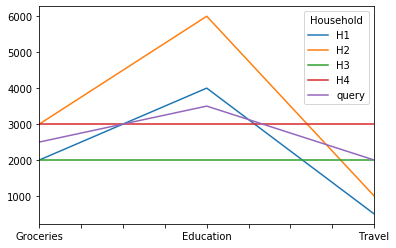

In [5]:
%matplotlib inline
house2.T.plot()

In [6]:
house_kNN = KNeighborsClassifier(n_neighbors=1) 
house_kNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
print('Query is classified as',house_kNN.predict([q])[0] )

Query is classified as C2


---
**Q**   
Change the metric used by k-NN to correlation to see if it will predict the other class.

In [8]:
house_C_kNN = KNeighborsClassifier(n_neighbors=1, metric='correlation') 
house_C_kNN.fit(X,y)
print('Query is classified as',house_C_kNN.predict([q])[0] )

Query is classified as C1
